In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [4]:
df=pd.read_csv("C:/Users/Nipun/Desktop/COD SOFT/CUSTOMER CHURN PREDICTION/Churn_Modelling.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
def describe_(df):
    dict_=pd.DataFrame()
    dict_['null_values']=df.isna().sum()
    dict_['unique_']=df.nunique().values  #no of unique values/categories for each feature

    return dict_
describe_(df).style.background_gradient(cmap='Blues')

,null_values,unique_
RowNumber,0,10000
CustomerId,0,10000
Surname,0,2932
CreditScore,0,460
Geography,0,3
Gender,0,2
Age,0,70
Tenure,0,11
Balance,0,6382
NumOfProducts,0,4


<Axes: xlabel='Exited', ylabel='count'>

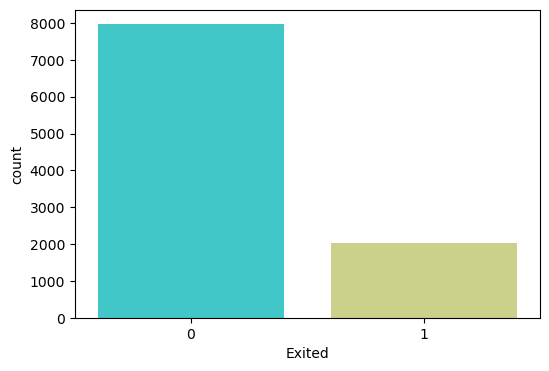

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited',data=df,palette='rainbow')

<Axes: xlabel='Gender', ylabel='count'>

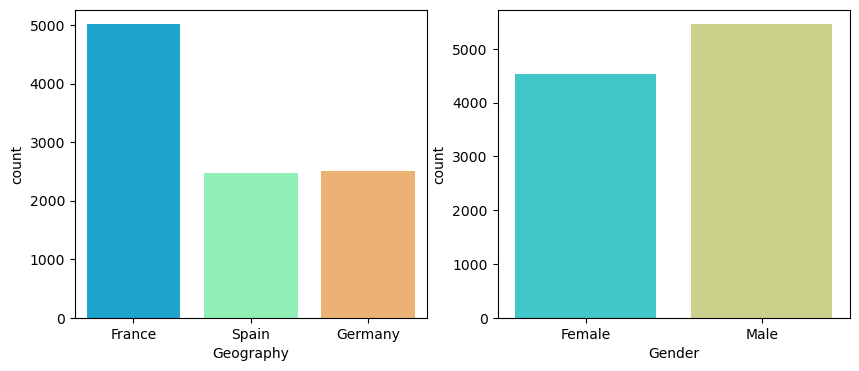

In [9]:
fig=plt.figure(figsize=(10,4))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))

sns.countplot(x='Geography',data=df,palette='rainbow',ax=ax[0])
sns.countplot(x='Gender',data=df,palette='rainbow',ax=ax[1])

<Axes: >

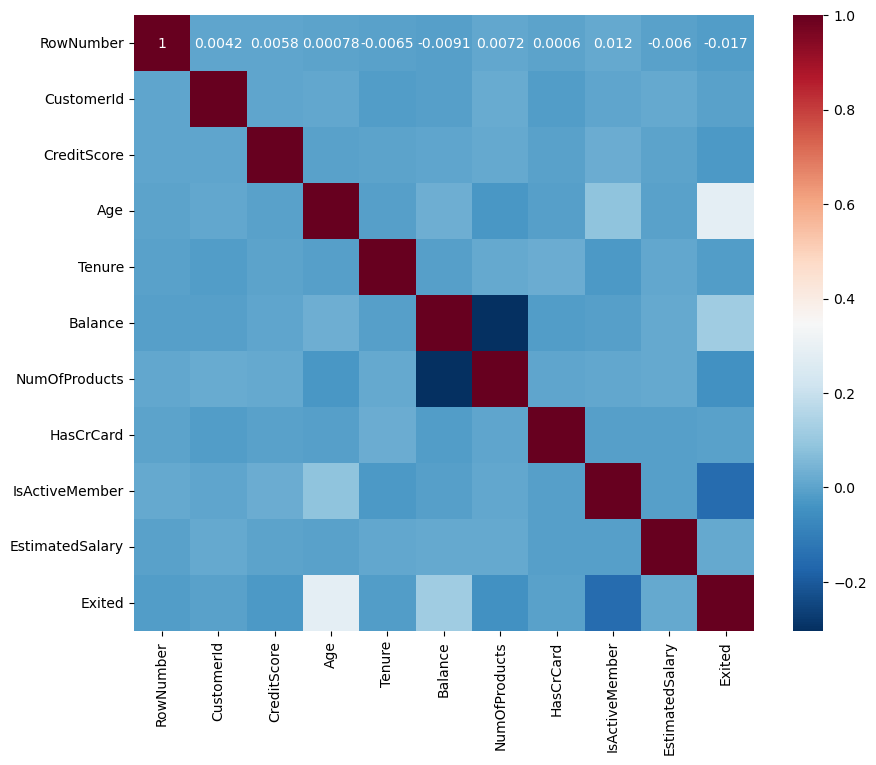

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
df_num=df[numerical_features]

plt.figure(figsize=(10,8))
corr=df_num.corr()
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10})

In [11]:
df_num=df[numerical_features]
df_cat=df[['Geography','Gender']]

In [12]:
df_num=df[numerical_features]
df_cat=df[['Geography','Gender']]

In [13]:
scaler=StandardScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)

In [14]:
encoder=OneHotEncoder()
df_cat=pd.DataFrame(encoder.fit_transform(df_cat).toarray())
df_cat.columns=df_cat.columns.astype(str)


In [15]:
df_=pd.concat([df_num,df_cat],axis=1)

In [16]:
y=df['Exited']

In [17]:
#using random forest algorithm
forest=RandomForestClassifier()
param_grid = {
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_search=RandomizedSearchCV(estimator=forest,param_distributions=param_grid,cv=3,scoring='roc_auc',n_iter=10,verbose=True)
     

In [18]:
grid_search.fit(df_,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 500]},
                   scoring='roc_auc', verbose=True)

In [19]:
forest=grid_search.best_estimator_
scores_forest=cross_val_score(forest,df_,y,cv=5)
print('Mean value of roc_auc_score for RF Classifier:{}'.format(np.mean(scores_forest)))

C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Nipun\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean value of roc_auc_score for RF Classifier:1.0


In [25]:
#using decision trees
tree=DecisionTreeClassifier()
param_grid={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search=RandomizedSearchCV(estimator=tree,param_distributions=param_grid,cv=5,scoring='roc_auc',n_iter=10,verbose=True)
     

In [26]:
grid_search.fit(df_,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='roc_auc', verbose=True)

In [27]:
tree=grid_search.best_estimator_
scores_tree=cross_val_score(tree,df_,y,cv=5)
print('Mean value of roc_auc_score for Dt Classifier:{}'.format(np.mean(scores_tree)))

Mean value of roc_auc_score for Dt Classifier:1.0


In [28]:
#using eXtreme Gradient Boosting (xgb)
xgb=XGBClassifier()
param_grid={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,cv=3,scoring='roc_auc',n_iter=10,verbose=True)
     

In [29]:
grid_search.fit(df_,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=True)

In [30]:
xgb=grid_search.best_estimator_
scores_xgb=cross_val_score(xgb,df_,y,cv=5)
print('Mean value of roc_auc_score for XGB Classifier:{}'.format(np.mean(scores_xgb)))

Mean value of roc_auc_score for XGB Classifier:1.0


In [33]:
#using Light Gradient Boosting Machine(lgbm)


lgbm=LGBMClassifier(objective = 'binary',
                     n_estimators = 500,
                     max_depth = 7,
                     learning_rate = 0.01,
                     num_leaves = 20,
                     reg_alpha = 3,
                     reg_lambda = 3,
                     subsample = 0.7,
                     colsample_bytree = 0.7)
lgbm_scores=cross_val_score(lgbm,df_,y,cv=3)
np.mean(lgbm_scores)

1.0

In [32]:
lgb=grid_search.best_estimator_
scores_lgb=cross_val_score(lgb,df_,y,cv=5)
print('Mean value of roc_auc_score for LGB Classifier:{}'.format(np.mean(scores_lgb)))

Mean value of roc_auc_score for LGB Classifier:1.0
